<h3>Data Pre-processing</h3>

In [1]:
import pandas as pd

df = pd.read_json("../News_Category_Dataset.json", lines=True)
print("df.shape = ", df.shape)
df.head()

df.shape =  (124989, 6)


,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [2]:
categories = df.groupby('category')
print("Total Categories : ", categories.ngroups)
print(categories.size())

Total Categories :  31
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       3858
BUSINESS           4254
COLLEGE            1144
COMEDY             3971
CRIME              2893
EDUCATION          1004
ENTERTAINMENT     14257
FIFTY              1401
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
IMPACT             2602
LATINO VOICES      1129
MEDIA              2815
PARENTS            3955
POLITICS          32739
QUEER VOICES       4995
RELIGION           2556
SCIENCE            1381
SPORTS             4167
STYLE              2254
TASTE              2096
TECH               1231
THE WORLDPOST      3664
TRAVEL             2145
WEIRD NEWS         2670
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          2579
dtype: int64


In [3]:
#from the above column we can see that there two columns which are same but with different names i.e WORLDPOST and THE WORLDPOST
#combining THE WORLDPOST and WORLDPOST

df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

categories = df.groupby('category')
print("Total Categories : ", categories.ngroups)
print(categories.size())

Total Categories :  30
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       3858
BUSINESS           4254
COLLEGE            1144
COMEDY             3971
CRIME              2893
EDUCATION          1004
ENTERTAINMENT     14257
FIFTY              1401
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
IMPACT             2602
LATINO VOICES      1129
MEDIA              2815
PARENTS            3955
POLITICS          32739
QUEER VOICES       4995
RELIGION           2556
SCIENCE            1381
SPORTS             4167
STYLE              2254
TASTE              2096
TECH               1231
TRAVEL             2145
WEIRD NEWS         2670
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          6243
dtype: int64


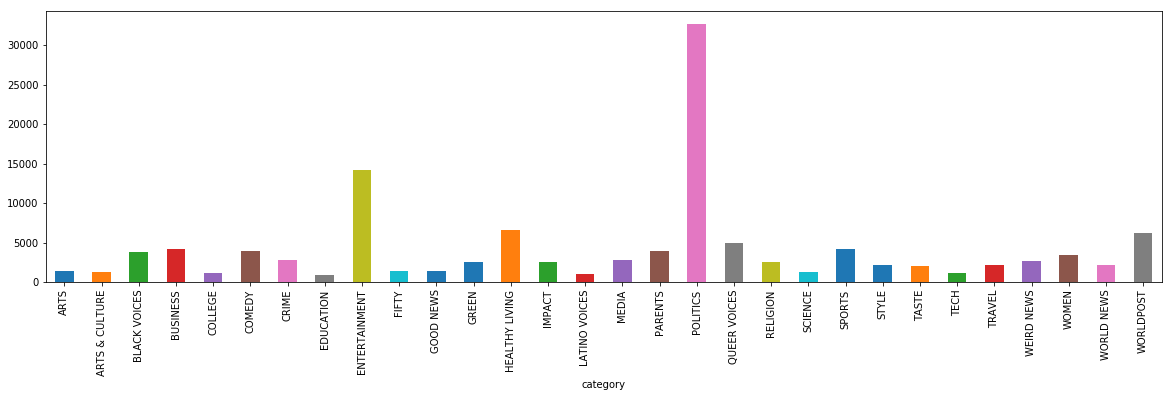

In [5]:
#Now we have 30 categories
#Plotting the number of each category

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
df.groupby('category').headline.count().plot.bar(ylim=0)
plt.show()

<h6>We can see that the number of news from POLITICS and ENTERTAINMENT is much larger than other categories</h6>

In [6]:
#Now, combining the texts of headline and short_description into one single text column.
#Then we can delete the columns which we dont need such as authors, date, etc.

df['text'] = df.headline + " " + df.short_description
del df['authors']
del df['date']
del df['headline']
del df['link']
del df['short_description']

categories_num = df.groupby('category').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories_num):
    category_int.update({k:i})
    int_category.update({i:k})
    
df['category2id'] = df['category'].apply(lambda x: category_int[x])

In [7]:
#Now, splitting the data into training and testing data.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df['text'], 
    df['category2id'], 
    random_state = 1
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  93741
Test dataset:  31248


In [8]:
#Now we will convert the text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

<h2>Applying ML Algorithms</h2>

<h3> 1. Naive Bayes</h3>

In [9]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB(fit_prior=False)
naive_bayes.fit(training_data, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [10]:
predictions_NB = naive_bayes.predict(testing_data)
predictions_NB

array([ 8,  8, 17, ..., 19,  8,  8])

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

print("Accuracy score: ", accuracy_score(Y_test, predictions_NB))
print("Recall score: ", recall_score(Y_test, predictions_NB, average = 'weighted'))
print("Precision score: ", precision_score(Y_test, predictions_NB, average = 'weighted'))
print("F1 score: ", f1_score(Y_test, predictions_NB, average = 'weighted'))
print("\n")
print(classification_report(Y_test, predictions_NB, target_names=df['category'].unique()))

Accuracy score:  0.5934779825908858
Recall score:  0.5934779825908858
Precision score:  0.5925939017901466
F1 score:  0.5633282094869992


                precision    recall  f1-score   support

         CRIME       0.53      0.24      0.33       364
 ENTERTAINMENT       0.45      0.06      0.11       326
    WORLD NEWS       0.48      0.33      0.39       919
        IMPACT       0.48      0.55      0.51      1025
      POLITICS       0.59      0.20      0.30       241
    WEIRD NEWS       0.59      0.30      0.40       974
  BLACK VOICES       0.54      0.63      0.58       774
         WOMEN       0.44      0.18      0.26       238
        COMEDY       0.56      0.81      0.66      3565
  QUEER VOICES       0.45      0.11      0.17       351
        SPORTS       0.50      0.12      0.19       340
      BUSINESS       0.52      0.44      0.47       692
        TRAVEL       0.46      0.72      0.56      1709
         MEDIA       0.39      0.22      0.28       665
          TECH      

<h3> 2. Stochastic Gradient Descent </h3>

In [12]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(training_data, Y_train)

/home/kushaldeb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [13]:
predictions_sgd = sgd.predict(testing_data)
predictions_sgd

array([26,  8, 19, ..., 17,  8,  8])

In [14]:
print("Accuracy score: ", accuracy_score(Y_test, predictions_sgd))
print("Recall score: ", recall_score(Y_test, predictions_sgd, average = 'weighted'))
print("Precision score: ", precision_score(Y_test, predictions_sgd, average = 'weighted'))
print("F1 score: ", f1_score(Y_test, predictions_sgd, average = 'weighted'))
print("\n")
print(classification_report(Y_test, predictions_sgd, target_names=df['category'].unique()))

Accuracy score:  0.5987583205325141
Recall score:  0.5987583205325141
Precision score:  0.5843972447180078
F1 score:  0.5813856378494302


                precision    recall  f1-score   support

         CRIME       0.53      0.29      0.37       364
 ENTERTAINMENT       0.41      0.21      0.28       326
    WORLD NEWS       0.51      0.40      0.45       919
        IMPACT       0.53      0.49      0.51      1025
      POLITICS       0.49      0.40      0.44       241
    WEIRD NEWS       0.48      0.38      0.42       974
  BLACK VOICES       0.60      0.47      0.53       774
         WOMEN       0.50      0.33      0.40       238
        COMEDY       0.57      0.78      0.66      3565
  QUEER VOICES       0.51      0.22      0.30       351
        SPORTS       0.36      0.24      0.28       340
      BUSINESS       0.50      0.37      0.43       692
        TRAVEL       0.51      0.61      0.56      1709
         MEDIA       0.39      0.16      0.23       665
          TECH      

<h3>3. Multiclass Logistic Regression</h3>

In [15]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(multi_class='multinomial', solver='saga')
logistic_regression.fit(training_data, Y_train)

/home/kushaldeb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
predictions_logr = logistic_regression.predict(testing_data)
predictions_logr

array([ 8,  8, 19, ...,  8,  8,  8])

In [17]:
print("Accuracy score: ", accuracy_score(Y_test, predictions_logr))
print("Recall score: ", recall_score(Y_test, predictions_logr, average = 'weighted'))
print("Precision score: ", precision_score(Y_test, predictions_logr, average = 'weighted'))
print("F1 score: ", f1_score(Y_test, predictions_logr, average = 'weighted'))
print("\n")
print(classification_report(Y_test, predictions_logr, target_names=df['category'].unique()))

Accuracy score:  0.6057667690732207
Recall score:  0.6057667690732207
Precision score:  0.5937661992141541
F1 score:  0.5942054732924906


                precision    recall  f1-score   support

         CRIME       0.48      0.33      0.39       364
 ENTERTAINMENT       0.41      0.23      0.29       326
    WORLD NEWS       0.49      0.43      0.46       919
        IMPACT       0.51      0.52      0.52      1025
      POLITICS       0.51      0.44      0.47       241
    WEIRD NEWS       0.48      0.41      0.44       974
  BLACK VOICES       0.59      0.53      0.56       774
         WOMEN       0.46      0.35      0.40       238
        COMEDY       0.62      0.76      0.68      3565
  QUEER VOICES       0.48      0.28      0.36       351
        SPORTS       0.39      0.28      0.33       340
      BUSINESS       0.55      0.44      0.49       692
        TRAVEL       0.52      0.63      0.57      1709
         MEDIA       0.33      0.22      0.27       665
          TECH      

<h3>4. Decision Tree</h3>

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(training_data, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
predictions_tree = decision_tree.predict(testing_data)
predictions_tree

array([ 8, 24, 17, ...,  9,  8,  8])

In [20]:
print("Accuracy score: ", accuracy_score(Y_test, predictions_tree))
print("Recall score: ", recall_score(Y_test, predictions_tree, average = 'weighted'))
print("Precision score: ", precision_score(Y_test, predictions_tree, average = 'weighted'))
print("F1 score: ", f1_score(Y_test, predictions_tree, average = 'weighted'))
print("\n")
print(classification_report(Y_test, predictions_tree, target_names=df['category'].unique()))

Accuracy score:  0.4690220174091142
Recall score:  0.4690220174091142
Precision score:  0.45507242581758134
F1 score:  0.458875560990765


                precision    recall  f1-score   support

         CRIME       0.25      0.21      0.23       364
 ENTERTAINMENT       0.28      0.16      0.20       326
    WORLD NEWS       0.34      0.27      0.30       919
        IMPACT       0.31      0.34      0.32      1025
      POLITICS       0.33      0.34      0.33       241
    WEIRD NEWS       0.26      0.33      0.29       974
  BLACK VOICES       0.37      0.32      0.34       774
         WOMEN       0.30      0.27      0.29       238
        COMEDY       0.50      0.59      0.54      3565
  QUEER VOICES       0.18      0.09      0.12       351
        SPORTS       0.13      0.10      0.11       340
      BUSINESS       0.34      0.26      0.29       692
        TRAVEL       0.36      0.42      0.39      1709
         MEDIA       0.18      0.12      0.15       665
          TECH      

<h3> 5. SVM</h3>

In [21]:
from sklearn import svm

svm = svm.LinearSVC()
svm.fit(training_data, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [22]:
predictions_svm = svm.predict(testing_data)
predictions_svm

array([ 8,  8, 19, ...,  8,  8,  8])

In [23]:
print("Accuracy score: ", accuracy_score(Y_test, predictions_svm))
print("Recall score: ", recall_score(Y_test, predictions_svm, average = 'weighted'))
print("Precision score: ", precision_score(Y_test, predictions_svm, average = 'weighted'))
print("F1 score: ", f1_score(Y_test, predictions_svm, average = 'weighted'))
print("\n")
print(classification_report(Y_test, predictions_svm, target_names=df['category'].unique()))

Accuracy score:  0.5626920122887865
Recall score:  0.5626920122887865
Precision score:  0.5533254429191865
F1 score:  0.5568456457554334


                precision    recall  f1-score   support

         CRIME       0.40      0.32      0.36       364
 ENTERTAINMENT       0.24      0.17      0.20       326
    WORLD NEWS       0.41      0.39      0.40       919
        IMPACT       0.44      0.47      0.45      1025
      POLITICS       0.38      0.39      0.39       241
    WEIRD NEWS       0.41      0.40      0.40       974
  BLACK VOICES       0.52      0.50      0.51       774
         WOMEN       0.36      0.32      0.34       238
        COMEDY       0.63      0.67      0.65      3565
  QUEER VOICES       0.36      0.32      0.33       351
        SPORTS       0.27      0.27      0.27       340
      BUSINESS       0.45      0.38      0.41       692
        TRAVEL       0.49      0.56      0.52      1709
         MEDIA       0.27      0.21      0.24       665
          TECH      

<h3>6. Random Forest</h3>

In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(training_data, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
predictions_randomforest = random_forest.predict(testing_data)
predictions_randomforest

array([ 6,  8, 17, ..., 17,  8,  8])

In [26]:
print("Accuracy score: ", accuracy_score(Y_test, predictions_randomforest))
print("Recall score: ", recall_score(Y_test, predictions_randomforest, average = 'weighted'))
print("Precision score: ", precision_score(Y_test, predictions_randomforest, average = 'weighted'))
print("F1 score: ", f1_score(Y_test, predictions_randomforest, average = 'weighted'))
print("\n")
print(classification_report(Y_test, predictions_randomforest, target_names=df['category'].unique()))

Accuracy score:  0.5158730158730159
Recall score:  0.5158730158730159
Precision score:  0.5006566455540259
F1 score:  0.48956738947088724


                precision    recall  f1-score   support

         CRIME       0.23      0.24      0.23       364
 ENTERTAINMENT       0.28      0.08      0.12       326
    WORLD NEWS       0.34      0.24      0.28       919
        IMPACT       0.35      0.43      0.39      1025
      POLITICS       0.31      0.44      0.36       241
    WEIRD NEWS       0.30      0.33      0.31       974
  BLACK VOICES       0.42      0.43      0.42       774
         WOMEN       0.33      0.26      0.29       238
        COMEDY       0.51      0.69      0.58      3565
  QUEER VOICES       0.29      0.15      0.19       351
        SPORTS       0.17      0.06      0.09       340
      BUSINESS       0.41      0.25      0.31       692
        TRAVEL       0.37      0.54      0.44      1709
         MEDIA       0.27      0.10      0.15       665
          TECH     